In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Reading and Understanding the Data

In [190]:
bikes=pd.read_csv("excelfiles/BoomBikes.csv")

In [191]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [192]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [193]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [194]:
(bikes["instant"].value_counts()>1).sum()

0

In [195]:
(bikes.dteday.value_counts()>1).sum()

0

1. there are no missing values
2. instant variable is an index number variable - no duplicates - so this variable is of no use for our anakysis, we can drop this variable
3. dteday is a date variable, we can standardise this variable. and it doesnt have any repetition too. it seems like only one bike has been rented on a particular day
4. casual and registered are combined as cnt - total counts so we can remove casual and registered variables.

In [196]:
bikes.drop(["instant","dteday","casual","registered"],axis = 1,inplace = True)

## Step 2:Visualization of the data

In [198]:
# visualising numeric variables
df=bikes[["temp","atemp","hum","windspeed","cnt"]]

<Figure size 1440x864 with 0 Axes>

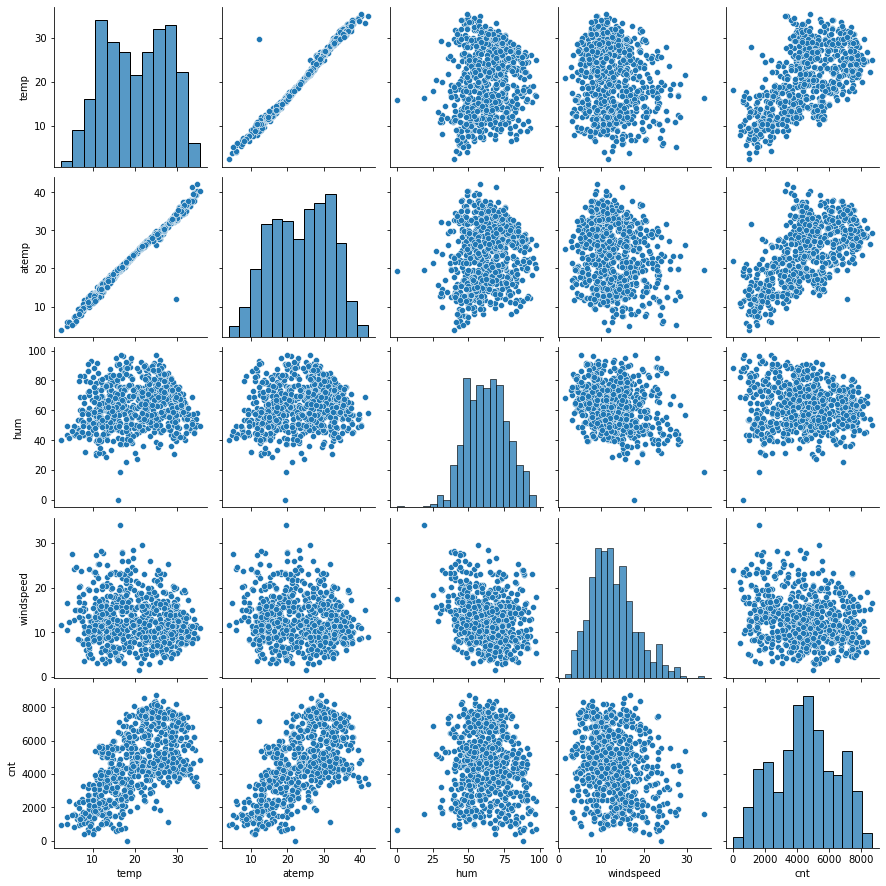

In [199]:
plt.figure(figsize=(20, 12))
sns.pairplot(df)

 1. temperature(temp and atemp) seems to have linear relationship with the count of total rental bikes.
2. windspeed and humidity doesn't seems to have a good linear relationship

In [200]:
#converting categorical vars


bikes['weathersit'] = bikes['weathersit'].map({1:'good weather', 2:'bad weather',3:'very bad weather'})
bikes["season"]=bikes["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [201]:
bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb',3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

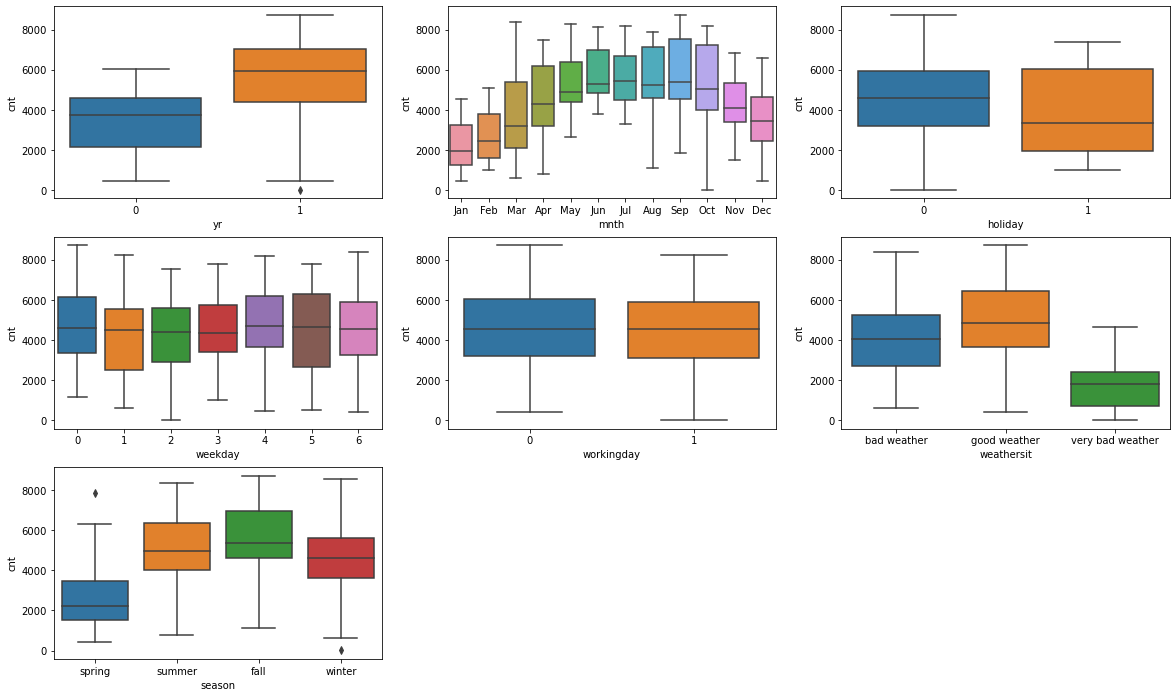

In [202]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)

plt.show()

In [203]:
# year - 2019 seems to have higher count than 2018
# month - count is low at start of the year, gets increased by the mid year and gradually decreases by end.
# holiday - on holidays counts seems to have broader distribution but weekdays has higher mean value.
# weekday - all weekday have same mean of total count.
# weathersit - if the weather is good it has more counts.
# season - fall and summer has high counts. fall season has bit higher than summer

## Step 3 :DATA Preparation

## Dummy Variables

In [204]:
weather=pd.get_dummies(bikes["weathersit"],drop_first=True)

In [205]:
weather.head()

,good weather,very bad weather
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [206]:
bikes = pd.concat([bikes,weather],axis=1)

In [207]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,good weather,very bad weather
0,spring,0,Jan,0,1,1,bad weather,14.110847,18.18125,80.5833,10.749882,985,0,0
1,spring,0,Jan,0,2,1,bad weather,14.902598,17.68695,69.6087,16.652113,801,0,0
2,spring,0,Jan,0,3,1,good weather,8.050924,9.47025,43.7273,16.636703,1349,1,0
3,spring,0,Jan,0,4,1,good weather,8.200000,10.60610,59.0435,10.739832,1562,1,0
4,spring,0,Jan,0,5,1,good weather,9.305237,11.46350,43.6957,12.522300,1600,1,0


In [208]:
season = pd.get_dummies(bikes["season"],drop_first=True)

In [209]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [210]:
bikes = pd.concat([bikes,season],axis=1)

In [211]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,good weather,very bad weather,spring,summer,winter
0,spring,0,Jan,0,1,1,bad weather,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,0
1,spring,0,Jan,0,2,1,bad weather,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,0
2,spring,0,Jan,0,3,1,good weather,8.050924,9.47025,43.7273,16.636703,1349,1,0,1,0,0
3,spring,0,Jan,0,4,1,good weather,8.200000,10.60610,59.0435,10.739832,1562,1,0,1,0,0
4,spring,0,Jan,0,5,1,good weather,9.305237,11.46350,43.6957,12.522300,1600,1,0,1,0,0


In [212]:
month = pd.get_dummies(bikes["mnth"],drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [213]:
bikes = pd.concat([bikes,month],axis=1)

In [214]:
bikes.drop(["weathersit","season","mnth"],axis = 1, inplace=True)

In [215]:
bikes.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,good weather,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [216]:
# weekday var has equal count in all day so droping it wont make any difference.
bikes.drop(["weekday"],axis=1,inplace = True)

## Step 4: Splitting the Data into Training and Testing Sets

In [217]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [218]:
#Rescaling using min-max
scaler=MinMaxScaler()

In [221]:
num_vars = ["temp","atemp","hum","windspeed","cnt"]

In [222]:
# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [223]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,good weather,very bad weather,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,good weather,very bad weather,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.627451,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.483958,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


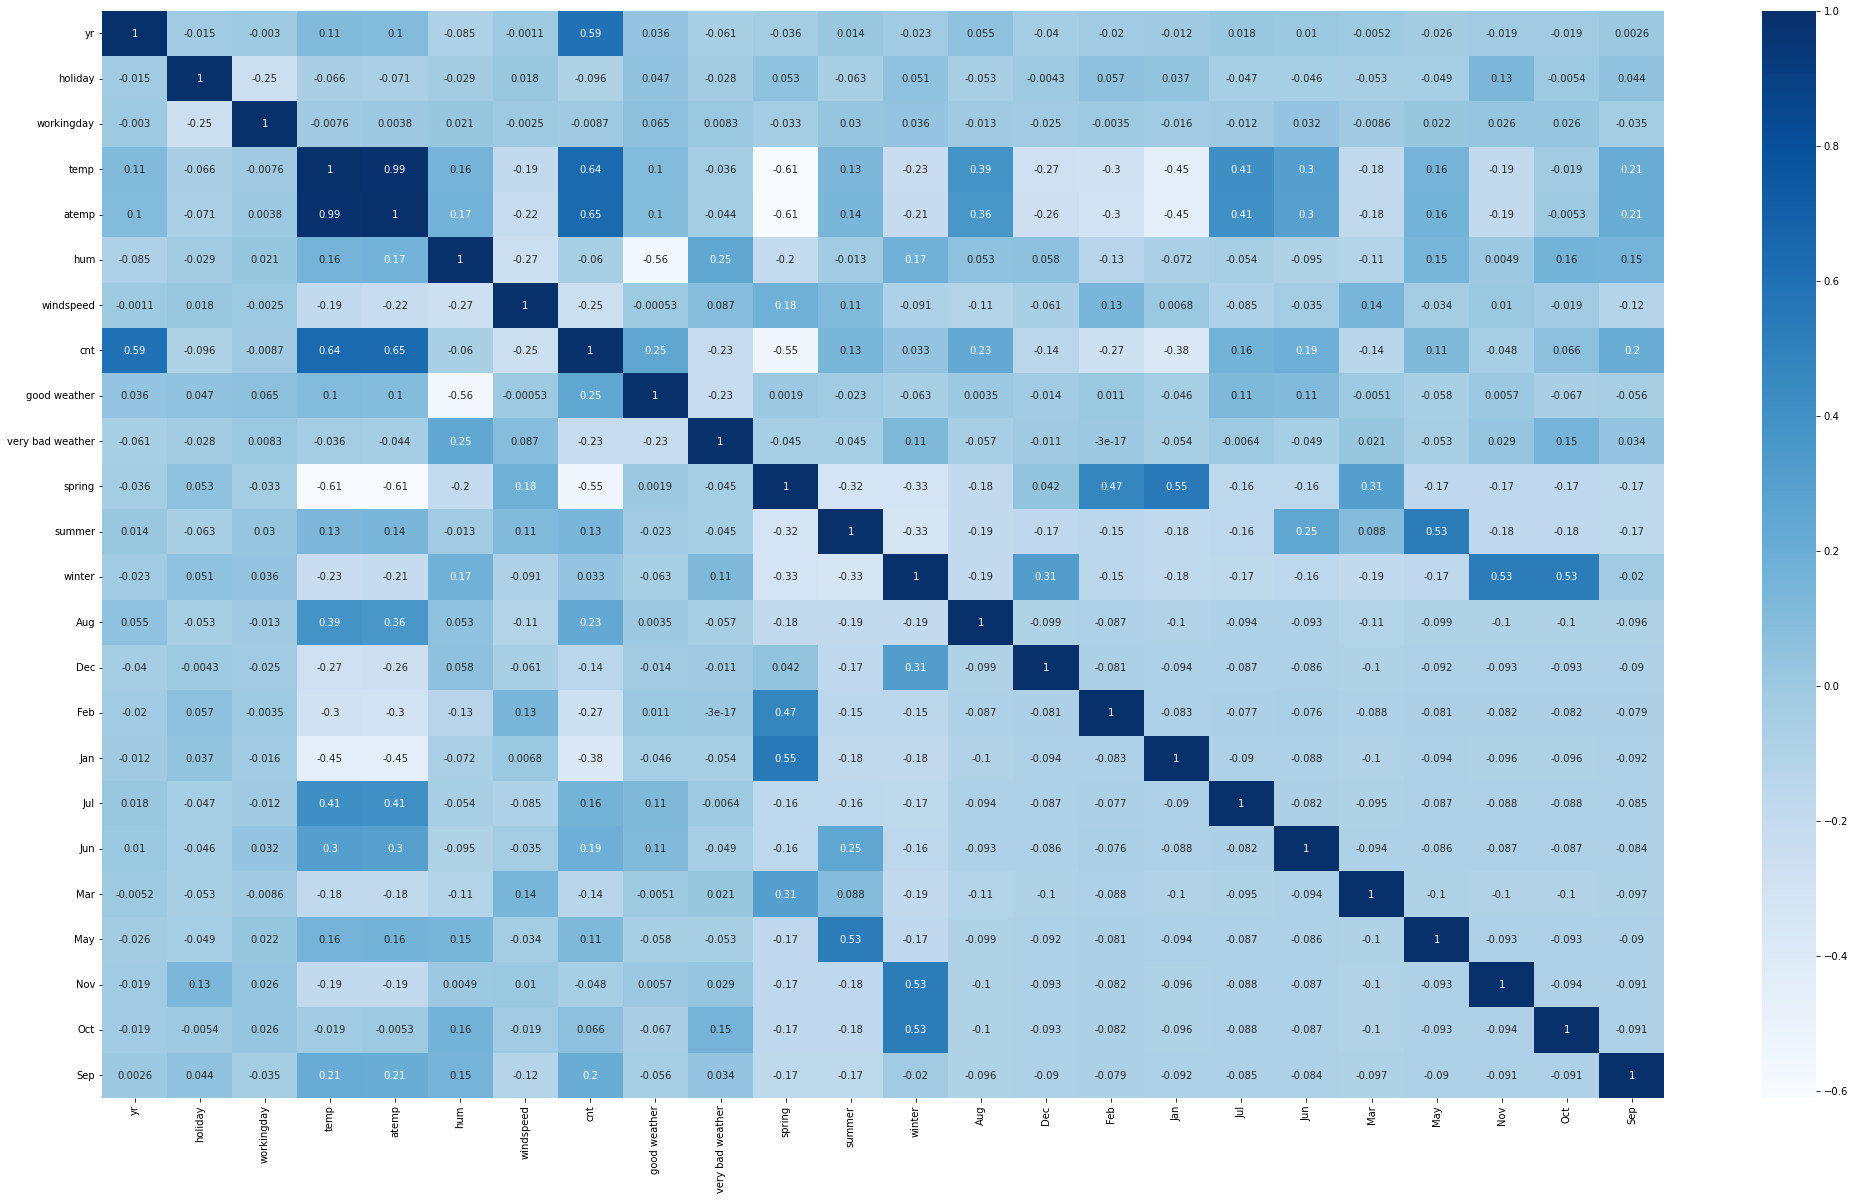

In [225]:
plt.figure(figsize = (35,20))
sns.heatmap(df_train.corr(),annot=True,cmap = "Blues")
plt.show()

According to heatmap,
atemp,temp,year has high correlation with cnt(total count).

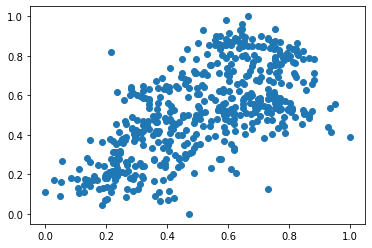

In [226]:

plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

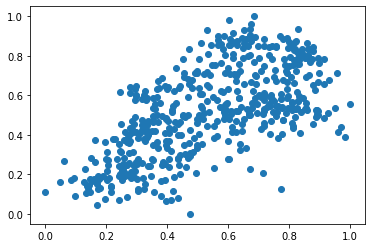

In [227]:

plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [228]:
y_train = df_train.pop('cnt')
X_train = df_train

In [229]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,good weather,very bad weather,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,1,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'good weather', 'very bad weather', 'spring', 'summer', 'winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

In [236]:
X_train_sm = sm.add_constant(X_train)

In [237]:
X_train_sm

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,good weather,very bad weather,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,...,0,0,0,0,1,0,0,0,0,0
578,1.0,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,...,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,...,0,1,0,0,0,0,0,0,0,0
350,1.0,0,0,1,0.248216,0.223544,0.577930,0.431816,0,0,...,1,0,0,0,0,0,0,0,0,0


In [238]:
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_sm).fit()

In [239]:
lr_1.params

const               0.283148
yr                  0.231117
holiday            -0.102202
workingday         -0.019414
temp                0.409774
atemp               0.046941
hum                -0.161945
windspeed          -0.185263
good weather        0.058733
very bad weather   -0.189965
spring             -0.048612
summer              0.039634
winter              0.105928
Aug                 0.019150
Dec                -0.042230
Feb                -0.030998
Jan                -0.058416
Jul                -0.041125
Jun                -0.001135
Mar                 0.004848
May                 0.025585
Nov                -0.039267
Oct                 0.006792
Sep                 0.085087
dtype: float64

In [240]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.27e-182
Time:                        22:09:44   Log-Likelihood:                 519.91
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     486   BIC:                            -890.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2831      0.047  

In [242]:
 vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,temp,435.78
4,atemp,380.64
5,hum,34.18
9,spring,12.03
11,winter,11.84
10,summer,7.22
21,Oct,6.49
20,Nov,6.23
12,Aug,6.03
15,Jan,5.33


In [281]:
# jun has high p value and low vif. lets remove jun
X=X_train.drop("Jun",axis=1)
X_train_sm = sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.13e-183
Time:                        22:46:02   Log-Likelihood:                 519.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     487   BIC:                            -896.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2828      0.046  

In [282]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,temp,394.74
4,atemp,373.24
5,hum,34.17
9,spring,11.89
11,winter,11.79
10,summer,6.85
19,Nov,5.89
20,Oct,5.79
15,Jan,5.30
6,windspeed,5.25


In [283]:
# Oct has high p value and low vif. lets remove Oct
X=X.drop("Oct",axis=1)
X_train_sm = sm.add_constant(X)
lr_3 = sm.OLS(y_train,X_train_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     130.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.00e-184
Time:                        22:46:04   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     488   BIC:                            -902.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2854      0.044  

In [284]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,temp,393.29
4,atemp,372.80
5,hum,30.65
9,spring,11.47
10,summer,6.41
11,winter,6.41
6,windspeed,5.13
15,Jan,4.27
7,good weather,3.82
2,workingday,3.76


In [285]:
# Mar has high p value and low vif. lets remove Mar
X=X.drop("Mar",axis=1)
X_train_sm = sm.add_constant(X)
lr_4 = sm.OLS(y_train,X_train_sm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     137.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.51e-186
Time:                        22:46:05   Log-Likelihood:                 519.87
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     489   BIC:                            -908.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2867      0.043  

In [286]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,temp,392.13
4,atemp,372.80
5,hum,29.73
9,spring,7.88
11,winter,6.38
10,summer,6.15
6,windspeed,5.13
7,good weather,3.79
2,workingday,3.76
12,Aug,3.16


In [287]:

# atemp has high p value and high vif. lets remove atemp
X=X.drop("atemp",axis=1)
X_train_sm = sm.add_constant(X)
lr_5 = sm.OLS(y_train,X_train_sm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.44e-187
Time:                        22:46:06   Log-Likelihood:                 519.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2864      0.043  

In [288]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,29.67
3,temp,24.45
8,spring,7.83
10,winter,6.31
9,summer,6.09
5,windspeed,4.88
6,good weather,3.79
2,workingday,3.74
11,Aug,3.13
15,Jul,2.79


In [289]:
# Aug has high p value and low vif. lets remove Aug
X=X.drop("Aug",axis=1)
X_train_sm = sm.add_constant(X)
lr_6 = sm.OLS(y_train,X_train_sm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.76e-188
Time:                        22:46:07   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2966      0.041  

In [290]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,27.54
3,temp,22.41
8,spring,5.94
5,windspeed,4.82
10,winter,4.35
6,good weather,3.75
2,workingday,3.74
9,summer,3.59
13,Jan,2.42
0,yr,2.10


In [291]:
# May has high p value and low vif. lets remove May
X=X.drop("May",axis=1)
X_train_sm = sm.add_constant(X)
lr_7 = sm.OLS(y_train,X_train_sm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.60e-188
Time:                        22:46:08   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2855      0.040  

In [292]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,27.53
3,temp,22.25
8,spring,5.93
5,windspeed,4.73
10,winter,4.35
2,workingday,3.74
6,good weather,3.73
9,summer,3.01
13,Jan,2.42
0,yr,2.09


In [293]:
# Feb has high p value and low vif. lets remove Feb
X=X.drop("Feb",axis=1)
X_train_sm = sm.add_constant(X)
lr_8 = sm.OLS(y_train,X_train_sm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.55e-189
Time:                        22:46:15   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2744      0.039  

In [294]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,26.84
3,temp,21.42
8,spring,4.98
5,windspeed,4.72
10,winter,4.35
2,workingday,3.73
6,good weather,3.70
9,summer,3.00
0,yr,2.09
14,Nov,1.86


In [295]:
# Dec has high p value and low vif. lets remove Dec
X=X.drop("Dec",axis=1)
X_train_sm = sm.add_constant(X)
lr_9 = sm.OLS(y_train,X_train_sm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.96e-189
Time:                        22:46:18   Log-Likelihood:                 514.54
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     494   BIC:                            -929.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2576      0.039  

In [296]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,24.93
3,temp,19.92
8,spring,4.98
5,windspeed,4.72
10,winter,4.14
2,workingday,3.73
6,good weather,3.60
9,summer,2.96
0,yr,2.08
11,Jan,1.68


In [297]:
# Nov has high p value and low vif. lets remove Nov 
X=X.drop("Nov",axis=1)
X_train_sm = sm.add_constant(X)
lr_10 = sm.OLS(y_train,X_train_sm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.33e-190
Time:                        22:46:22   Log-Likelihood:                 513.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     495   BIC:                            -933.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2511      0.039  

In [298]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,24.86
3,temp,19.73
8,spring,4.93
5,windspeed,4.67
10,winter,3.79
2,workingday,3.72
6,good weather,3.58
9,summer,2.95
0,yr,2.08
11,Jan,1.67


In [299]:
# Jan has high p value and low vif. lets remove it
X=X.drop("Jan",axis=1)
X_train_sm = sm.add_constant(X)
lr_11 = sm.OLS(y_train,X_train_sm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.89e-190
Time:                        22:46:24   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     496   BIC:                            -936.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2395      0.038  

In [300]:

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,hum,23.79
3,temp,18.81
8,spring,4.67
5,windspeed,4.66
10,winter,3.74
2,workingday,3.72
6,good weather,3.56
9,summer,2.94
0,yr,2.07
11,Jul,1.59


In [301]:
# workingday has high p value and low vif. lets remove it
X=X.drop("workingday",axis=1)
X_train_sm = sm.add_constant(X)
lr_12 = sm.OLS(y_train,X_train_sm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.69e-190
Time:                        22:46:31   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2300      0.038  

In [302]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,hum,22.89
2,temp,18.79
7,spring,4.65
4,windspeed,4.64
9,winter,3.72
5,good weather,3.44
8,summer,2.93
0,yr,2.07
10,Jul,1.59
11,Sep,1.39


In [303]:
# Spring has high p value and low vif. so we can remove it
X=X.drop("spring",axis=1)
X_train_sm = sm.add_constant(X)
lr_13 = sm.OLS(y_train,X_train_sm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          3.89e-190
Time:                        22:46:33   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1740      0.032  

In [304]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
2,temp,10.55
3,hum,10.45
4,windspeed,3.85
5,good weather,2.73
0,yr,2.03
7,summer,1.76
8,winter,1.71
9,Jul,1.55
10,Sep,1.29
6,very bad weather,1.13


In [305]:
# Jul has high p value and low vif. so we can remove it
X=X.drop("Jul",axis=1)
X_train_sm = sm.add_constant(X)
lr_14 = sm.OLS(y_train,X_train_sm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.80e-190
Time:                        22:46:36   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1738      0.032  

In [306]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,hum,10.18
2,temp,8.35
4,windspeed,3.84
5,good weather,2.73
0,yr,2.02
8,winter,1.67
7,summer,1.58
9,Sep,1.21
6,very bad weather,1.13
1,holiday,1.04


In [307]:
# very bad weather has high p value and low vif. so we can remove it
X=X.drop("very bad weather",axis=1)
X_train_sm = sm.add_constant(X)
lr_15 = sm.OLS(y_train,X_train_sm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.76e-180
Time:                        22:46:49   Log-Likelihood:                 476.21
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     500   BIC:                            -890.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2022      0.034      6.016   

In [308]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,hum,10.03
2,temp,8.35
4,windspeed,3.80
5,good weather,2.63
0,yr,2.02
7,winter,1.66
6,summer,1.58
8,Sep,1.21
1,holiday,1.04


In [309]:
#hum has negative coefficient and high vif.
X=X.drop("hum",axis=1)
X_train_sm = sm.add_constant(X)
lr_16 = sm.OLS(y_train,X_train_sm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     265.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.09e-174
Time:                        22:50:59   Log-Likelihood:                 460.69
No. Observations:                 510   AIC:                            -903.4
Df Residuals:                     501   BIC:                            -865.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0408      0.018      2.290   

In [310]:
 vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
2,temp,4.34
3,windspeed,3.08
4,good weather,2.56
0,yr,2.00
5,summer,1.55
6,winter,1.33
7,Sep,1.20
1,holiday,1.04


## Step 7: Residual Analysis of the train data


In [311]:
y_train_price = lr_16.predict(X_train_sm)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

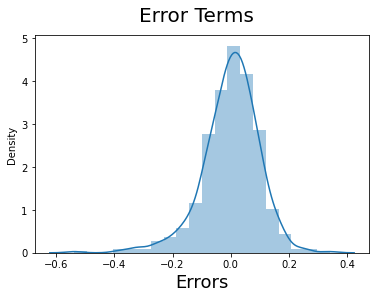

In [312]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Model evaluation using test data

In [314]:
## Applying scaler on test data set
# fit on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [316]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,good weather,very bad weather,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.652968,0.027397,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.477117,0.163612,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [317]:
y_test = df_test.pop('cnt')
X_test = df_test

In [318]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_sm = X_test_sm.drop(["Jun", "Oct","Mar","atemp","Aug","May","Feb","Dec","Nov","Jan","workingday","spring","Jul","very bad weather","hum"], axis = 1)


In [319]:
# Making predictions using the fourth model

y_test_pred = lr_16.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

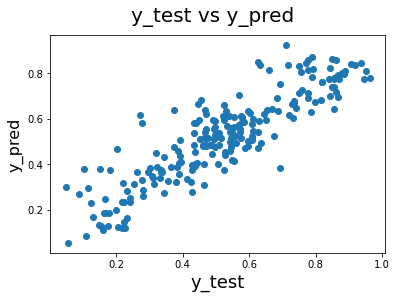

In [320]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [321]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.782887535627888

We have the best fit equation using linear reggression model

cnt =0.0408+0.2365*yr-0.0934*holiday+0.5428*temp-0.1756*windspeed+0.0953*good weather+0.0890*summer+0.1218*winter+0.0976*Sep

Predictions:
    the demand is high when
    1. no holiday
    2. temperature is slightly high
    3. windspeed is low
    4. good weather
    5. summer and winter
    6. September